In [1]:
import wikipedia as wp 
import re
import requests
import spacy
import spacy_transformers
from spacy import displacy
from spacy.matcher import Matcher
import networkx as nx
from pyvis.network import Network

c:\Users\N.Rishita Naga Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wp.set_lang("en")
title = " 'Inida' "
data = wp.page(title).content
print(data)

India, officially the Republic of India, is a country in South Asia.  It is the seventh-largest country by area; the most populous country since 2023; and since its independence in 1947, the world's most populous democracy. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is near Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand, Myanmar, and Indonesia.
Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago. Their long occupation, predominantly in isolation as hunter-gatherers, has made the region highly diverse. Settled life emerged on the subcontinent in the western margins of the Indus river basin 9,000 years ago, evolving gradually into the Indus Valley Civilisation of the third 

In [3]:
data = data.lower().replace('\n', "")
data = re.sub('== see also ==.*|[@#:&\"]|===.*?===|==.*?==|\(.*?\)', '', data)
print(data)

github  is a proprietary developer platform that allows developers to create, store, manage, and share their code. it uses git to provide distributed version control and github itself provides access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project. headquartered in california, github, inc. has been a subsidiary of microsoft since 2018.it is commonly used to host open source software development projects. as of january 2023, github reported having over 100 million developers and more than 420 million repositories, including at least 28 million public repositories. it is the world's largest source code host as of june 2023. over five billion developer contributions were made to more than 500 million open source projects in 2024.the development of the github platform began on october 19, 2005. the site was launched in april 2008 by tom preston-werner, chris wanstrath, p. j. hyett and scott chacon after it had been avai

In [4]:
#!python -m spacy download en_core_web_lg

In [5]:
import spacy
nlp = spacy.load('en_core_web_lg')
doc=nlp(data)
displacy.render(doc,style="ent",jupyter=True)

In [6]:
#pip install coreferee


In [7]:
#!python -m coreferee install en

In [8]:
#pip show spacy coreferee


In [9]:
nlp.add_pipe('coreferee')
doc = nlp(data)
doc._.coref_chains.print()

0: github(0), github(31), github(60), github(88)
1: platform(6), it(22), itself(32)
2: developers(9), their(19)
3: january(85), it(110)
4: site(154), it(176), its(189)
5: werner(164), werner(265), werner(274), werner(286), his(289)
6: .(202), company(240), its(253)
7: employees(220), them(229)
8: layer(243), his(268)
9: ceo(260), ceo(305)
10: management.github(330), its(341), its(352), github(388), github(442), github(487), github(507), github(518), github(569), github(597), github(615), github(642), github(681), github(699), github(735), github(756), github(811), github(825)
11: company(367), company(430), company(485)
12: horowitz(372), horowitz(416)
13: january(631), january(637)
14: repositories.in(678), its(688), its(737), it(759), its(796), its(807)
15: microsoft(750), microsoft(805)
16: microsoft(839), microsoft(902), microsoft(909), microsoft(929), microsoft(966)
17: friedman(849), friedman(866), he(873)
18: github(971), its(976), its(994), github(1027), github(1035), github(10

In [10]:
resolved_data = ""
for token in doc:
    resolved_coref = doc._.coref_chains.resolve(token)
    if resolved_coref:
        resolved_data += " " + " and ".join(r.text for r in resolved_coref)
    elif token.dep_ == "punct":
        resolved_data += token.text
    else:
        resolved_data += " " + token.text
print(resolved_data)

 github   is a proprietary developer platform that allows developers to create, store, manage, and share developers code. platform uses git to provide distributed version control and github platform provides access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project. headquartered in california, github, inc . has been a subsidiary of microsoft since 2018.it is commonly used to host open source software development projects. as of january 2023, github reported having over 100 million developers and more than 420 million repositories, including at least 28 million public repositories. january is the world 's largest source code host as of june 2023. over five billion developer contributions were made to more than 500 million open source projects in 2024.the development of the github platform began on october 19, 2005. the site was launched in april 2008 by tom preston- werner, chris wanstrath, p. j. hyett and scott chacon

In [11]:
def extract_relationship(sentence):
    doc = nlp(sentence)
    
    first, last = None, None
    
    for chunk in doc.noun_chunks:
        if not first:
            first = chunk
        else:
            last = chunk

    if first and last:
        return (first.text.strip(), last.text.strip(), str(doc[first.end:last.start]).strip())
    
    return (None, None, None)

In [12]:
from pyvis.network import Network
import networkx as nx

def print_five_words(text):
    return " ".join(text.split()[:5]) if text else ""

graph_doc = nlp(resolved_data)

nx_graph = nx.DiGraph()

for _, sent in enumerate(graph_doc.sents):  
    if len(sent) > 3:
        a, b, c = extract_relationship(str(sent))
        if a and b:
            nx_graph.add_node(a, size=5)
            nx_graph.add_node(b, size=5)
            nx_graph.add_edge(a, b, weight=1, title=print_five_words(c), arrows="to")

g = Network(notebook=True, cdn_resources="in_line")
g.from_nx(nx_graph)

html_str = g.generate_html()
with open("example.html", "w", encoding="utf-8") as f:
    f.write(html_str)

print("Graph saved successfully as example.html")


Graph saved successfully as example.html


In [13]:
print(nx_graph.edges(['manhattan']))

[]


In [14]:
g_html = g.generate_html()  # Generate the HTML content
with open("example.html", "w", encoding="utf-8") as f:
    f.write(g_html)

# Now open the file in a browser manually
import webbrowser
webbrowser.open("example.html")


True

In [15]:
#pip install matplotlib

In [16]:
#pip install scipy

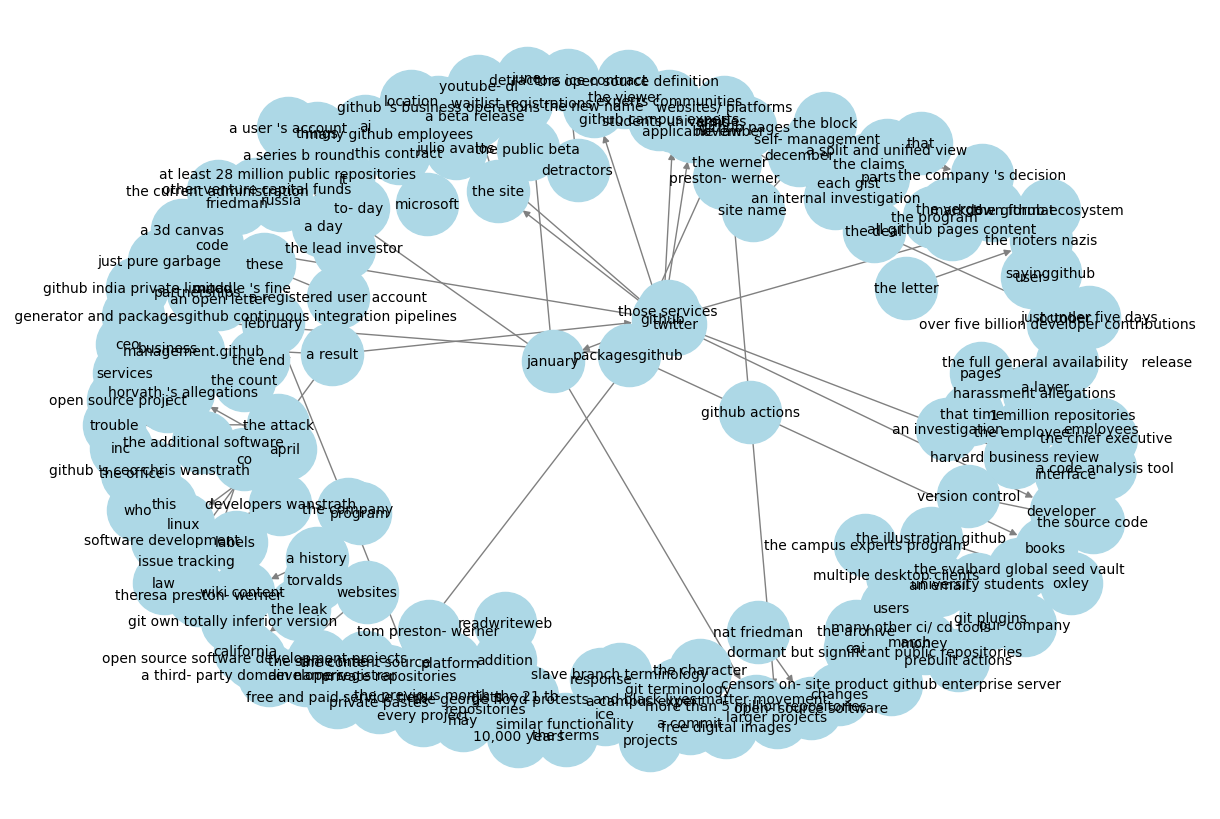

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12, 8))
nx.draw(nx_graph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()
